In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
# Terminal --> pip install mlxtend

#from mlxtend.feature_selection

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [12]:
data = pd.read_excel('loan data.xlsx')
data.head(1)

,Credit_Score,Employed,Income,Dependent,Loan
0,1,1,1,0,1


In [13]:
model = AdaBoostClassifier(n_estimators=3)


In [14]:
x = data.drop(columns='Loan')
y = data['Loan']

In [15]:
model.fit(x,y)

AdaBoostClassifier(n_estimators=3)

In [26]:
!pip install plot_tree

ERROR: Could not find a version that satisfies the requirement plot_tree (from versions: none)
ERROR: No matching distribution found for plot_tree


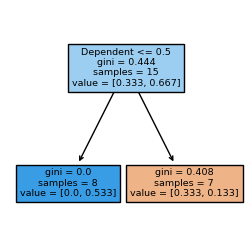

In [29]:
plt.figure(figsize=(3,3))
plot_tree(model[0], feature_names=['Credit_Score','Employed','Income','Dependent'],filled= True)
plt.show()

In [19]:
data.columns

Index(['Credit_Score', 'Employed', 'Income', 'Dependent', 'Loan'], dtype='object')

[Text(0.5, 0.75, 'Credit_Score <= 0.5\ngini = 0.5\nsamples = 15\nvalue = [0.5, 0.5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0.0, 0.5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0.5, 0.0]')]

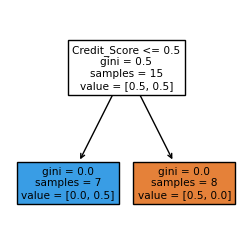

In [30]:
plt.figure(figsize=(3,3))
plot_tree(model[1], feature_names=['Credit_Score','Employed','Income','Dependent'],filled= True)

## Gradient Boosting


In [32]:
model_GB = GradientBoostingClassifier(n_estimators=2)

In [33]:
model_GB.fit(x,y)

GradientBoostingClassifier(n_estimators=2)

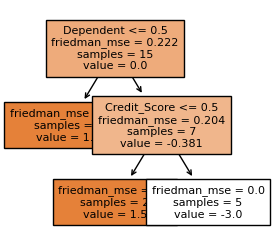

In [37]:
plt.figure(figsize=(3,3))
plot_tree(model_GB.estimators_[0,0], feature_names=['Credit_Score','Employed','Income','Dependent'],filled= True,fontsize=8)
plt.show()

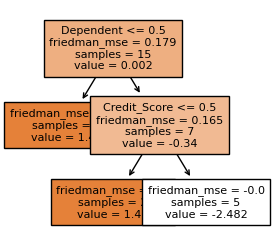

In [38]:
plt.figure(figsize=(3,3))
plot_tree(model_GB.estimators_[1,0], feature_names=['Credit_Score','Employed','Income','Dependent'],filled= True,fontsize=8)
plt.show()

## Gradient Boosting Regressor


In [47]:
df = pd.DataFrame({'Exp':[2,3,5,6], 'Edu':[1,2,2,3],
                  'salary':[50000,70000,80000,100000]})

In [48]:
# In Classification it is log of odds and in regression it will take average of our target variable
df['Initial Leaf'] = df['salary'].mean()
df

,Exp,Edu,salary,Initial Leaf
0,2,1,50000,75000.0
1,3,2,70000,75000.0
2,5,2,80000,75000.0
3,6,3,100000,75000.0


In [49]:
# calculate the residuals
df['Residual_1'] = df['salary'] - df['Initial Leaf']
df

,Exp,Edu,salary,Initial Leaf,Residual_1
0,2,1,50000,75000.0,-25000.0
1,3,2,70000,75000.0,-5000.0
2,5,2,80000,75000.0,5000.0
3,6,3,100000,75000.0,25000.0


In [51]:
# Decisison Tree 1: Exp, Edu vs Residuals
model1 = DecisionTreeRegressor(max_depth=2)
model1.fit(df[['Exp','Edu']], df['Residual_1'])

DecisionTreeRegressor(max_depth=2)

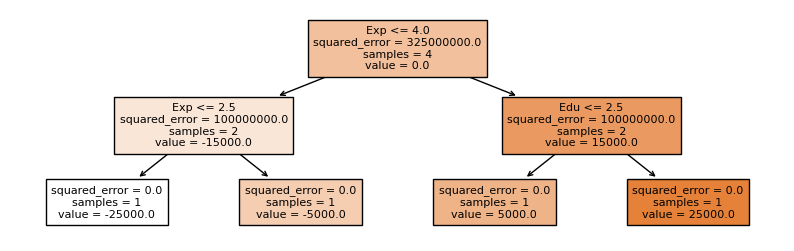

In [53]:
plt.figure(figsize=(10,3))
plot_tree(model1, feature_names=['Exp','Edu'],filled= True,fontsize=8)
plt.show()

In [54]:
df['Output_tree1'] = 0.1*model1.predict(df[['Exp','Edu']])

In [55]:
df

,Exp,Edu,salary,Initial Leaf,Residual_1,Output_tree1
0,2,1,50000,75000.0,-25000.0,-2500.0
1,3,2,70000,75000.0,-5000.0,-500.0
2,5,2,80000,75000.0,5000.0,500.0
3,6,3,100000,75000.0,25000.0,2500.0


In [57]:
# Calculate teh new prediction
df['New_pred1'] = df['Initial Leaf'] + df['Output_tree1']
df

,Exp,Edu,salary,Initial Leaf,Residual_1,Output_tree1,New_pred1
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0


In [58]:
# Residual 2
df['residual2'] = df['salary'] - df['New_pred1']
df

,Exp,Edu,salary,Initial Leaf,Residual_1,Output_tree1,New_pred1,residual2
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0,-22500.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0,-4500.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0,4500.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0,22500.0


In [61]:
# Decisison Tree 2: Exp, Edu vs Residuals
model2 = DecisionTreeRegressor(max_depth=2)
model2.fit(df[['Exp','Edu']], df['residual2'])

DecisionTreeRegressor(max_depth=2)

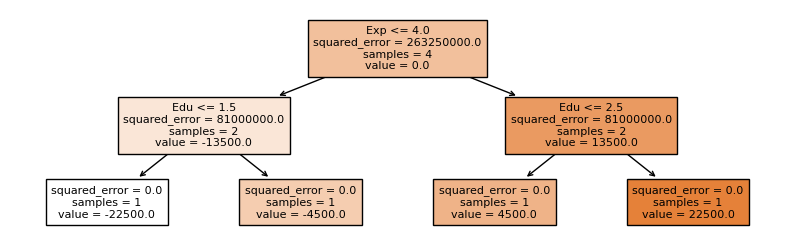

In [62]:
plt.figure(figsize=(10,3))
plot_tree(model2, feature_names=['Exp','Edu'],filled= True,fontsize=8)
plt.show()

In [63]:
df['Output_tree2'] = 0.1*model2.predict(df[['Exp','Edu']])
df

,Exp,Edu,salary,Initial Leaf,Residual_1,Output_tree1,New_pred1,residual2,Output_tree2
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0,-22500.0,-2250.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0,-4500.0,-450.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0,4500.0,450.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0,22500.0,2250.0


In [65]:
# Calculate teh new prediction
df['New_pred2'] = df['New_pred1'] + df['Output_tree2']
df

,Exp,Edu,salary,Initial Leaf,Residual_1,Output_tree1,New_pred1,residual2,Output_tree2,New_pred2
0,2,1,50000,75000.0,-25000.0,-2500.0,72500.0,-22500.0,-2250.0,70250.0
1,3,2,70000,75000.0,-5000.0,-500.0,74500.0,-4500.0,-450.0,74050.0
2,5,2,80000,75000.0,5000.0,500.0,75500.0,4500.0,450.0,75950.0
3,6,3,100000,75000.0,25000.0,2500.0,77500.0,22500.0,2250.0,79750.0


In [66]:
# Acrual Gradient Bossting
model_gbr = GradientBoostingRegressor(n_estimators=2,max_depth=2)

In [68]:
model_gbr.fit(df[['Exp','Edu']],df['salary'])

GradientBoostingRegressor(max_depth=2, n_estimators=2)

In [69]:
model_gbr.predict(df[['Exp','Edu']])


array([70250., 74050., 75950., 79750.])

In [70]:
df['New_pred2']

0    70250.0
1    74050.0
2    75950.0
3    79750.0
Name: New_pred2, dtype: float64